<a href="https://colab.research.google.com/github/treetops81/HR-Research-Project/blob/main/Question_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Our problem statement for this section is "Is there any relationship between who a person works for and their performance score?"

To investigate this I'll be looking at for correlation between the variables and see if there is any statistics that can be used on our populations

In [1]:
# data manipulation
import pandas as pd
import numpy as np

# visualisation
import matplotlib.pyplot as plt
import seaborn as sns

# statistics
import scipy.stats

# useful
from collections import Counter

In [2]:
df = pd.read_csv(r'https://raw.githubusercontent.com/treetops81/HR-Research-Project/main/HRDataset_v14_Edited.csv')

In [3]:
df.head()

,Unnamed: 0,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,Termd,PositionID,Position,State,Zip,DOB,Sex,MaritalDesc,CitizenDesc,HispanicLatino,RaceDesc,DateofHire,DateofTermination,TermReason,EmploymentStatus,Department,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences,Remote
0,0,"Adinolfi, Wilson K",10026,0,0,1,1,5,4,0,62506,0,19,Production Technician I,MA,1960,1983-07-10,M,Single,US Citizen,0,White,2011-07-05,NaN,N/A-StillEmployed,Active,Production,Michael Albert,22,LinkedIn,Exceeds,4.60,5,0,1/17/2019,0,1,0
1,1,"Ait Sidi, Karthikeyan",10084,1,1,1,5,3,3,0,104437,1,27,Sr. DBA,MA,2148,1975-05-05,M,Married,US Citizen,0,White,2015-03-30,2016-06-16,career change,Voluntarily Terminated,IT/IS,Simon Roup,4,Indeed,Fully Meets,4.96,3,6,2/24/2016,0,17,0
2,2,"Akinkuolie, Sarah",10196,1,1,0,5,5,3,0,64955,1,20,Production Technician II,MA,1810,1988-09-19,F,Married,US Citizen,0,White,2011-07-05,2012-09-24,hours,Voluntarily Terminated,Production,Kissy Sullivan,20,LinkedIn,Fully Meets,3.02,3,0,5/15/2012,0,3,0
3,3,"Alagbe,Trina",10088,1,1,0,1,5,3,0,64991,0,19,Production Technician I,MA,1886,1988-09-27,F,Married,US Citizen,0,White,2008-01-07,NaN,N/A-StillEmployed,Active,Production,Elijiah Gray,16,Indeed,Fully Meets,4.84,5,0,1/3/2019,0,15,0
4,4,"Anderson, Carol",10069,0,2,0,5,5,3,0,50825,1,19,Production Technician I,MA,2169,1989-09-08,F,Divorced,US Citizen,0,White,2011-07-11,2016-09-06,return to school,Voluntarily Terminated,Production,Webster Butler,39,Google Search,Fully Meets,5.00,4,0,2/1/2016,0,2,0


Lets start checking the Manager ID & Manager Names, as they are one of the key elements to understanding this question

In [4]:
# Quick check that our ManagerID counts equal the number of the entries in the dataset
df.shape[0] - df.ManagerID.value_counts().sum()

0

In [5]:
df.ManagerName.value_counts()

Elijiah Gray          22
Michael Albert        22
Kelley Spirea         22
Kissy Sullivan        22
Brannon Miller        22
David Stanley         21
Amy Dunn              21
Ketsia Liebig         21
Webster Butler        21
Janet King            19
Simon Roup            17
John Smith            14
Peter Monroe          14
Lynn Daneault         13
Alex Sweetwater        9
Brian Champaigne       8
Brandon R. LeBlanc     7
Jennifer Zamora        7
Eric Dougall           4
Debra Houlihan         3
Board of Directors     2
Name: ManagerName, dtype: int64

Lets just check that the manager names are correctly mapping to an individual manager ID.

In [6]:
df.groupby(['ManagerName','ManagerID'])['ManagerID'].count()

ManagerName         ManagerID
Alex Sweetwater     10            9
Amy Dunn            11           21
Board of Directors  9             2
Brandon R. LeBlanc  1             6
                    3             1
Brannon Miller      12           22
Brian Champaigne    13            8
David Stanley       14           21
Debra Houlihan      15            3
Elijiah Gray        16           22
Eric Dougall        6             4
Janet King          2            19
Jennifer Zamora     5             7
John Smith          17           14
Kelley Spirea       18           22
Ketsia Liebig       19           21
Kissy Sullivan      20           22
Lynn Daneault       21           13
Michael Albert      22           21
                    30            1
Peter Monroe        7            14
Simon Roup          4            17
Webster Butler      39           21
Name: ManagerID, dtype: int64

In [7]:
df[df['ManagerName'] == 'Michael Albert']['ManagerID'].value_counts()

22    21
30     1
Name: ManagerID, dtype: int64

In [8]:
def correct_manager_id(manager_name):
  if manager_name == 'Michael Albert':
    return 22
  elif manager_name == 'Brandon R. LeBlanc':
    return 1

In [9]:
df['ManagerID_Corrected'] = df['ManagerName'].apply(lambda x: correct_manager_id(x))

In [10]:
df.groupby(['ManagerName','ManagerID'])['ManagerID'].count()

ManagerName         ManagerID
Alex Sweetwater     10            9
Amy Dunn            11           21
Board of Directors  9             2
Brandon R. LeBlanc  1             6
                    3             1
Brannon Miller      12           22
Brian Champaigne    13            8
David Stanley       14           21
Debra Houlihan      15            3
Elijiah Gray        16           22
Eric Dougall        6             4
Janet King          2            19
Jennifer Zamora     5             7
John Smith          17           14
Kelley Spirea       18           22
Ketsia Liebig       19           21
Kissy Sullivan      20           22
Lynn Daneault       21           13
Michael Albert      22           21
                    30            1
Peter Monroe        7            14
Simon Roup          4            17
Webster Butler      39           21
Name: ManagerID, dtype: int64

In [11]:
df.loc[df['ManagerID_Corrected'].isnull(),'ManagerID_Corrected'] =  df['ManagerID']
df['ManagerID_Corrected'] = df['ManagerID_Corrected'].astype('int64')
df = df.drop(columns=['ManagerID'])

In [12]:
df.groupby(['ManagerName','ManagerID_Corrected'])['ManagerID_Corrected'].count()

ManagerName         ManagerID_Corrected
Alex Sweetwater     10                      9
Amy Dunn            11                     21
Board of Directors  9                       2
Brandon R. LeBlanc  1                       7
Brannon Miller      12                     22
Brian Champaigne    13                      8
David Stanley       14                     21
Debra Houlihan      15                      3
Elijiah Gray        16                     22
Eric Dougall        6                       4
Janet King          2                      19
Jennifer Zamora     5                       7
John Smith          17                     14
Kelley Spirea       18                     22
Ketsia Liebig       19                     21
Kissy Sullivan      20                     22
Lynn Daneault       21                     13
Michael Albert      22                     22
Peter Monroe        7                      14
Simon Roup          4                      17
Webster Butler      39                  

We can now be happy that our managers are all mapped to different ID's and every employee has a manager in our dataset!

Next lets look at performance score.

In [13]:
df.PerformanceScore.value_counts()

Fully Meets          243
Exceeds               37
Needs Improvement     18
PIP                   13
Name: PerformanceScore, dtype: int64

In [14]:
df.PerfScoreID.value_counts()

3    243
4     37
2     18
1     13
Name: PerfScoreID, dtype: int64

At first glance it looks like our data has performance scores and ID's correctly mapped, lets do one final check

In [15]:
df.groupby(['PerformanceScore','PerfScoreID'])['PerfScoreID'].count()

PerformanceScore   PerfScoreID
Exceeds            4               37
Fully Meets        1                1
                   3              242
Needs Improvement  2               18
PIP                1               12
                   3                1
Name: PerfScoreID, dtype: int64

Lets correct the two incorrect cases (Fully Meets mapped to 1 and PIP mapped to 3), assuming that the performance score is correct.

In [16]:
df.loc[(df['PerfScoreID'] == 1) & (df['PerformanceScore'] == 'Fully Meets'), 'PerfScoreID'] = 3
df.loc[(df['PerfScoreID'] == 3) & (df['PerformanceScore'] == 'PIP'), 'PerfScoreID'] = 1

These now looks better!

In [17]:
df.groupby(['PerformanceScore','PerfScoreID'])['PerfScoreID'].count()

PerformanceScore   PerfScoreID
Exceeds            4               37
Fully Meets        3              243
Needs Improvement  2               18
PIP                1               13
Name: PerfScoreID, dtype: int64

As our manager IDs are not continuous, we are not able to use a simple correlation matrix. We will instead have to look at ....

Our PerfScoreID is unlikely to provide much predicting power to an individual manager, so we will assume that any link we do find between Manager ID & Performance ID is causal in that direction.

In [18]:
df_Manager_Performance = df.loc[:,['ManagerID_Corrected','PerfScoreID']]

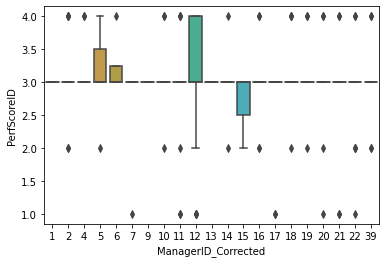

In [19]:
sns.boxplot(x = df_Manager_Performance['ManagerID_Corrected'], y = df_Manager_Performance['PerfScoreID'])

In [20]:
comp_perf_mean = round(df_Manager_Performance.PerfScoreID.mean(),3)
print('The average performance score for all our employees is:', round(df_Manager_Performance.PerfScoreID.mean(),3))

The average performance score for all our employees is: 2.977


In [21]:
print('The variance of performance score for all our employees is:', round(df_Manager_Performance.PerfScoreID.var(),3))

The variance of performance score for all our employees is: 0.345


In [22]:
df_agg = df.groupby('ManagerName').agg({'PerfScoreID': ['count','mean', 'min', 'max','var']})
df_agg.columns = ['Count', 'Performance Mean', 'Performance Min', 'Performance Max', 'Performance Variance']
df_agg = df_agg.reset_index()
df_agg.sort_values(['Count','Performance Mean'], ascending = False)

,ManagerName,Count,Performance Mean,Performance Min,Performance Max,Performance Variance
13,Kelley Spirea,22,3.090909,2,4,0.181818
8,Elijiah Gray,22,3.000000,2,4,0.190476
15,Kissy Sullivan,22,2.954545,1,4,0.331169
4,Brannon Miller,22,2.909091,1,4,1.134199
17,Michael Albert,22,2.863636,1,4,0.409091
14,Ketsia Liebig,21,3.047619,2,4,0.147619
6,David Stanley,21,3.000000,2,4,0.100000
20,Webster Butler,21,3.000000,2,4,0.200000
1,Amy Dunn,21,2.904762,1,4,0.590476
10,Janet King,19,3.105263,2,4,0.321637


In [23]:
agg_df = pd.DataFrame(df_agg.sort_values(['Count','Performance Mean'], ascending = False))
manager_names = agg_df.iloc[:15, 0]

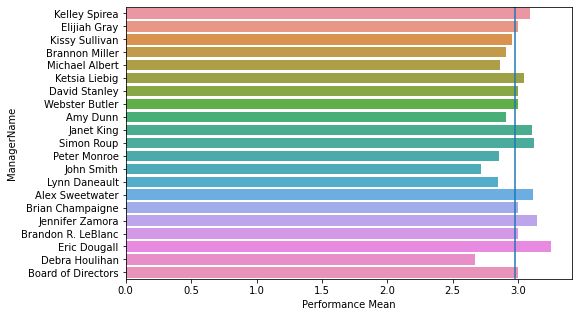

In [31]:
plt.figure(figsize=(8,5))
graph = sns.barplot(x = agg_df['Performance Mean'], y = agg_df.ManagerName)
graph.axvline(comp_perf_mean)

We can see that our company wide average is very similar to the average for each team.

Now we have an average performance score of all of our employees and the average performance score for each managers employees.
To test if the these average performances are statstically different, we'll apply a single sampled t test for each population.
We can run this test because:
- Our data is contiuous (at an interval of 1)
- Our observations are independant (as they are different employees)
- Our managers have a random sample of employees (in the sense that a specific employee is not more likely to have one manager over another outsize of team size*)
- Our data is approximately normally distributed
- Variance is comparable in between groups
- No outliers

*Because of this, we will limit our testing to managers with 9 or more employees.


In [25]:
list_of_obs = []
list_of_results = []
list_of_pvalues = []
for n in range(0,15):
  list_of_obs.append([])
  list_of_results.append([])
  list_of_pvalues.append([])

In [26]:
for count, manager in enumerate(manager_names):
  print(manager)
  list_of_obs[count] = df[df['ManagerName'] == manager].PerfScoreID

Kelley Spirea
Elijiah Gray
Kissy Sullivan
Brannon Miller
Michael Albert
Ketsia Liebig
David Stanley
Webster Butler
Amy Dunn
Janet King
Simon Roup
Peter Monroe
John Smith
Lynn Daneault
Alex Sweetwater


Lets apply our t test for each of our managers

In [27]:
for count, manager in enumerate(manager_names):
  list_of_results[count] = scipy.stats.ttest_1samp(list_of_obs[count], comp_perf_mean).statistic
  list_of_pvalues[count] = scipy.stats.ttest_1samp(list_of_obs[count], comp_perf_mean).pvalue

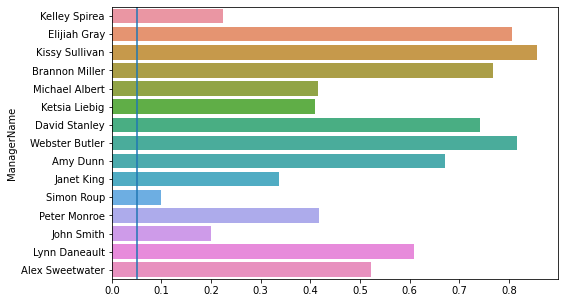

In [28]:
plt.figure(figsize=(8,5))
graph = sns.barplot(x = list_of_pvalues, y = manager_names)
graph.axvline(0.05)

The above chart shows the pvalues for the t test comparing if the performance scores for each managers employees are statistically different from the company average. The lowest pvalue is 0.1, which means that using the normal 95th percentile we cannot conclude that a specific manager affects performance score.